In [1]:
import sys
sys.path.append('./lib/')

with open('./lib/common_imports.py') as f:
    exec(f.read())

import warnings
warnings.filterwarnings('ignore')

from power import plot_power

# Power

## Power

Power is the probability of rejecting the null hypothesis when it is false. Ergo, power (as its name would suggest) is a good thing; you want more power. A type II error (a bad thing, as its name would suggest) is failing to reject the null hypothesis when it’s false; the probability of a type II error is usually called $\beta$. Note $\text{Power} = 1 − \beta$.

Let’s go through an example of calculating power. Consider our previous example involving RDI.

$ H_{0} : \mu = 30$ versus $H_{a} : \mu \gt 30$

Then Power is:

$$
P\left( \frac{\bar{X}-30}{s/ \sqrt{n}} \gt t_{1-\alpha, n-1} ; \mu = \mu_{a} \right)
$$

Note that this is a function that depends on the specific value of $\mu_{a}$! Further notice that as $\mu_{a}$ approaches $30$, the power approaches $\alpha$.

Pushing this example further, we reject if

$$
Z = \frac{\bar{X} - 30}{\sigma /\sqrt{n}} \gt Z_{1-\alpha, n-1}
$$

Or, equivalently, if:

$$
\bar{X} > 30 + Z_{1-\alpha} \frac{\sigma}{\sqrt{n}}
$$

But, note that, under $H_{0} : \bar{X} \sim \mathcal{N}(\mu_{0}, \sigma^{2}/n)$. However, under $H_{a} : \bar{X} \sim \mathcal{N}(\mu_{a}, \sigma^{2}/n)$

In [2]:
from scipy.stats import norm

alpha = 0.05
mu_a = 32
mu_0 = 30
sigma = 4
n = 16

z = norm.ppf(1-alpha)

print("Probability of rejection under the Null Hypothesis (Type I error rate) = {}".format(np.round(norm.sf(mu_0 + z * sigma/np.sqrt(n), loc = mu_0, scale = sigma/np.sqrt(n)), 2)))
print("Power = {}".format(norm.sf(mu_0 + z * sigma/np.sqrt(n), loc = mu_a, scale = sigma/np.sqrt(n))))

Probability of rejection under the Null Hypothesis (Type I error rate) = 0.05
Power = 0.6387600313123348


When we plug in $\mu_{0}$, the value under the null hypothesis, we get that the probability of rejection is $5 \%$, as the test was designed. However, when we plug in a value of $32$, we get $64\%$. Therefore, the probability of rejection is $64\%$ when the true value of $\mu$ is $32$. We could create a curve of the power as a function of $\mu_{a}$, as seen below. We also varied the sample size to see how the curve depends on that.

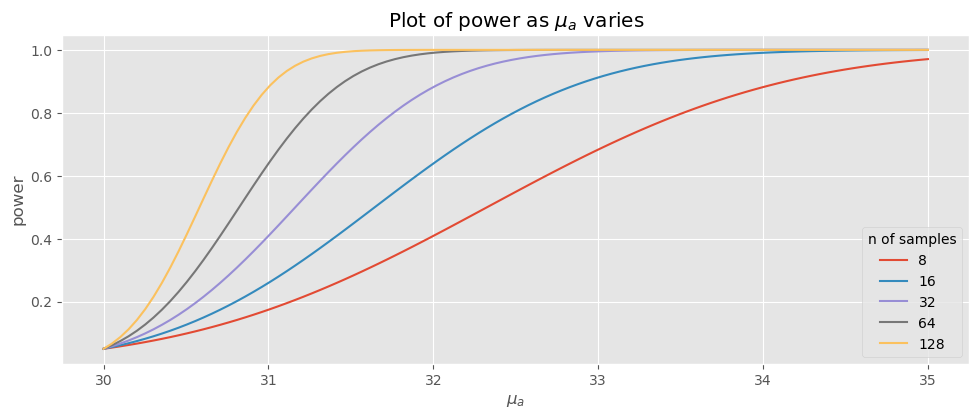

In [3]:
plot_power()

## Question

When testing $H_{a} : \mu \gt \mu{0}$, notice if power is $1-\beta$, then

$$
1- \beta = P\left( \bar{X} \gt \mu_{0} + z_{1-\alpha} \frac{\sigma}{\sqrt{n}}; \mu = \mu_{a} \right)
$$

where $\bar{X} \sim \mathcal{N}(\mu_{a}, \sigma^{2}/n)$. The unknowns in the equation are: $\mu_{a}$, $\sigma$, $n$, $\beta$ and the knowns are: $\mu_{0}$, $\alpha$. Specify any $3$ of the unknowns and you can solve for the remainder.

## Notes

- The calculation for $H_{a} : \mu \lt \mu_{0}$ is similar
- For $H_{0} : \mu \neq \mu_{0}$ calculate the one sided power using $\alpha/2$ (this is only approximately right, it excludes the probability of getting a large TS in the opposite direction of the truth)
- Power goes up as $\alpha$ gets larger
- Power of a one sided test is greater than the power of the associated two sided test
- Power goes up as $\mu_{1}$ gets further away from $\mu_{0}$
- Power goes up as $n$ goes up
- Power doesn't need $\mu_{a}$, $\sigma$ and $n$, instead only $\frac{\sqrt{n}(\mu_{a} - \mu_{0})}{\sigma}$
    - The quantity $\frac{(\mu_{a} - \mu_{0})}{\sigma}$ is called *effect size*, the difference in the means in standard deviation units
    - Being unit free, it has some hope of interpretability across settings

## T-test power

Consider calculating power for a Gosset’s $t$ test for our example where we now assume that $n = 16$. 

The power is

$$
P \left(\frac{\bar{X}-\mu_{0}}{S/\sqrt{n}} \gt t_{1-\alpha, n-1}; \mu = \mu_{a} \right)
$$

Calculating this requires the so-called non-central $t$ distribution. However, fortunately for us, the Python `TTestPower` module from `statsmodels.stats.power` library provides the `solve_power()` function that calculate it very well. Omit (exactly) any one of the arguments and it solves for it. Our t-test power again only relies on the effect size.

Let's do our example trying different options.

In [4]:
from statsmodels.stats.power import TTestPower

analysis = TTestPower()

result = analysis.solve_power(
    effect_size=2/4,
    power=None,
    nobs = 16,
    alpha = alpha,
    alternative='larger'
)

print(result)

0.6040328683316007


In [5]:
# specifying the power and getting n

analysis = TTestPower()

result = analysis.solve_power(
    effect_size=2/4,
    power=0.8,
    nobs = None,
    alpha = alpha,
    alternative='larger'
)

print(result)

26.13750446526348


## Additional Notes - R programming `power.t.test` vs Python `statsmodels.stats.power`

In R programming, the `power.t.test` is a powerful (no pun intended) function to perform the power $t$ test. By omitting (exactly) any one of the arguments, it solves for the unknown we wish to calculate the parameter. As an example, 

```R
# omitting the power and getting a power estimate
> ~power.t.test(n = 16, delta = 2/4, sd = 1, type = "one.sample", alt = "one.sided")$power
[1] 0.604

# specifying the power and getting n
> power.t.test(power = 0.8, delta = 2/4, sd = 1, type = "one.sample", alt = "one\
.sided")$n
[1] 26.14
```

In Python, the `TTestPower()` function from `statsmodels.stats.power` library works in a very similar way

In [6]:
from statsmodels.stats.power import TTestPower

analysis = TTestPower()

alpha = 0.05
result = analysis.solve_power(
    effect_size=2/4,
    power=None,
    nobs = 16,
    alpha = alpha,
    alternative='larger'
)

print(result)

# specifying the power and getting n

analysis = TTestPower()

result = analysis.solve_power(
    effect_size=2/4,
    power=0.8,
    nobs = None,
    alpha = alpha,
    alternative='larger'
)

print(result)

0.6040328683316007
26.13750446526348
